In [6]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Conv2D,  BatchNormalization, Add, Activation, MaxPooling2D, concatenate, Flatten, Dense, AveragePooling2D
from keras.optimizers import Adam
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential



import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

In [7]:
# Path to the main flower dataset folder
dataset_folder = 'Crops\Rice'

In [8]:
# List of class names
class_names = ['Brown_Spot','Healthy','Leaf_Blast','Neck_Blast']


In [9]:
# Load and preprocess images
data = []
labels = []

In [10]:
for class_idx, class_name in enumerate(class_names):
    class_folder = os.path.join(dataset_folder, class_name)
    for img_file in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_file)
        img = Image.open(img_path)
        img = img.resize((32, 32))
        img_array = np.array(img)
        data.append(img_array)
        labels.append(class_idx)

In [11]:
# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)
# Split the dataset into training and testing sets

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)



In [13]:
# Print the shapes of the datasets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape", x_val.shape)
print("y_val shape :", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (2232, 32, 32, 3)
y_train shape: (2232,)
x_val shape (558, 32, 32, 3)
y_val shape : (558,)
x_test shape: (698, 32, 32, 3)
y_test shape: (698,)


In [14]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

In [15]:
# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 4)
y_val = keras.utils.to_categorical(y_val, 4)
y_test = keras.utils.to_categorical(y_test, 4)
     

In [16]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)
early_stopping=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)


In [17]:
from tensorflow.keras import layers, Sequential
from keras import applications 
from tensorflow.keras.optimizers import SGD
from keras.layers  import Input
from tensorflow.keras.layers import AveragePooling2D, Input, Flatten, Dense, Dropout
from keras.models import Model
from tensorflow.keras.optimizers import Adam

In [18]:
#custom Model
customModel = Sequential()
customModel=Sequential(
    [
        layers.Conv2D(512,3,input_shape=(32,32,3),padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(256,3,padding='same',activation='relu'),
        layers.Conv2D(256,3,padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(128,3,padding='same',activation='relu'),
        layers.Conv2D(128,3,padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(64,3,padding='same',activation='relu'),
        layers.Conv2D(64,3,padding='same',activation='relu'),
        layers.BatchNormalization(),        
        layers.MaxPooling2D(),
        layers.Conv2D(32,3,padding='same',activation='relu'),
        layers.Conv2D(32,3,padding='same',activation='relu'),
        layers.BatchNormalization(),        
        layers.MaxPooling2D(),
        layers.Flatten(),

        layers.Dense(512,activation='relu'),
        layers.Dense(256,activation='relu'),
        layers.Dense(128,activation='relu'),
        layers.Dense(4,activation='softmax'),
    ]
)

In [19]:
customModel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
customModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 512)       14336     
                                                                 
 batch_normalization (Batch  (None, 32, 32, 512)       2048      
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 512)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 256)       1179904   
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 256)       590080    
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 256)      

In [20]:
y_train.shape

(2232, 4)

In [21]:
history = customModel.fit(
    x_train,y_train,
    epochs=35,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint,early_stopping])


Epoch 1/35
70/70 [==============================] - 66s 909ms/step - loss: 0.9174 - accuracy: 0.5918 - val_loss: 1.3601 - val_accuracy: 0.2867
Epoch 2/35


c:\Users\VAIBHAV\PycharmProjects\pythonProject\venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


70/70 [==============================] - 64s 921ms/step - loss: 0.6426 - accuracy: 0.7133 - val_loss: 1.9627 - val_accuracy: 0.3369
Epoch 3/35
70/70 [==============================] - 65s 925ms/step - loss: 0.6160 - accuracy: 0.7227 - val_loss: 1.4186 - val_accuracy: 0.3566
Epoch 4/35
70/70 [==============================] - 66s 945ms/step - loss: 0.6122 - accuracy: 0.7236 - val_loss: 1.1140 - val_accuracy: 0.4928
Epoch 5/35
70/70 [==============================] - 65s 936ms/step - loss: 0.5908 - accuracy: 0.7325 - val_loss: 1.3834 - val_accuracy: 0.4247
Epoch 6/35
70/70 [==============================] - 66s 939ms/step - loss: 0.5909 - accuracy: 0.7280 - val_loss: 1.1801 - val_accuracy: 0.5108
Epoch 7/35
70/70 [==============================] - 66s 938ms/step - loss: 0.5841 - accuracy: 0.7428 - val_loss: 0.7085 - val_accuracy: 0.6882
Epoch 8/35
70/70 [==============================] - 66s 942ms/step - loss: 0.5623 - accuracy: 0.7496 - val_loss: 1.5097 - val_accuracy: 0.4928
Epoch 9/35

In [22]:
val_loss, val_acc = customModel.evaluate(x_val,y_val)
print('Validation accuracy : ', val_acc)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']




18/18 [==============================] - 4s 229ms/step - loss: 0.9238 - accuracy: 0.6254
Validation accuracy :  0.6254480481147766


In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

18/18 [==============================] - 4s 222ms/step


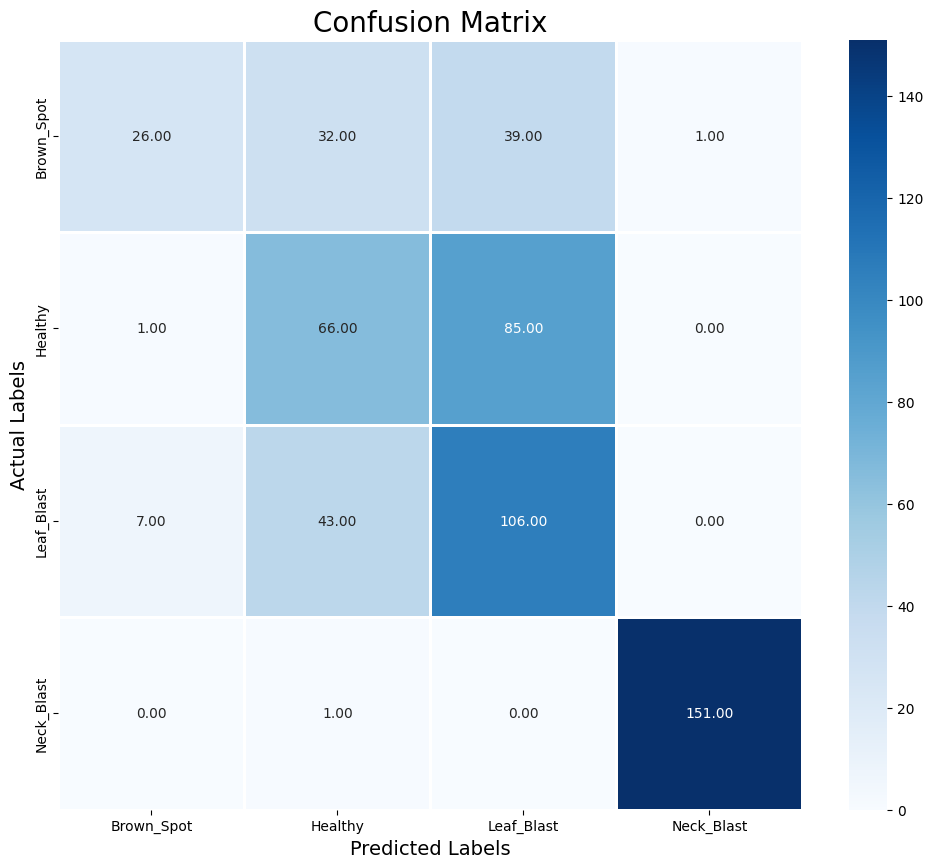

              precision    recall  f1-score   support

           0       0.76      0.27      0.39        98
           1       0.46      0.43      0.45       152
           2       0.46      0.68      0.55       156
           3       0.99      0.99      0.99       152

    accuracy                           0.63       558
   macro avg       0.67      0.59      0.60       558
weighted avg       0.66      0.63      0.62       558

22/22 [==============================] - 5s 233ms/step - loss: 0.9012 - accuracy: 0.6461


In [24]:
from sklearn.metrics import confusion_matrix,classification_report
valid_pres=customModel.predict(x_val)
valid_pred = [np.argmax(pred) for pred in valid_pres]
y_val = np.argmax(y_val, axis=1)
cm =confusion_matrix(y_val,valid_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in class_names] , columns = [i for i in class_names])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_val,valid_pred))


score = customModel.evaluate(x_test, y_test)
     

In [25]:

print('Test Loss:', score[0])
print('Test accuracy:', score[1])






Test Loss: 0.9012462496757507
Test accuracy: 0.6461318135261536


In [26]:
customModel.save('Rice_Saved_Model')



INFO:tensorflow:Assets written to: Rice_Saved_Model\assets


INFO:tensorflow:Assets written to: Rice_Saved_Model\assets


In [27]:
import tensorflow as tf
import numpy as np
from PIL import Image
import tensorflow as tf
model = tf.keras.models.load_model('Rice_Saved_Model')




In [28]:

def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((32, 32))
    
    # Convert to RGB in case the image has an alpha channel
    img = img.convert('RGB')
    
    img_array = np.array(img)
    img_array = img_array.astype('float32') / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [29]:
# List of class names
class_names = ['Brown_Spot','Healthy','Leaf_Blast','Neck_Blast']

In [ ]:
# Predict the class
image_path = 'flowers/rose/12240303_80d87f77a3_n.jpg'
input_image = preprocess_image(image_path)
predictions = model.predict(input_image)

predicted_class = np.argmax(predictions)
predicted_class_name = class_names[predicted_class]

print("Predicted class:", predicted_class_name)


